In [71]:
import pandas as pd
import numpy as np
import nltk

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
!pip install wordcloud

cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 2.5.1 which is incompatible.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [76]:
imdb=pd.read_csv("D:/dataset/imdb_sentiment.csv")

In [77]:
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [78]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

### Bag of words Analysis

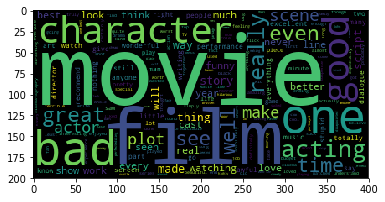

In [81]:
input_str=' '.join(imdb['review'])
wc=WordCloud(background_color='black').generate(input_str)
plt.imshow(wc)

### Text cleaning
    --Convert every charcter to lower case
    --Remove junk charcters
    --Remove commonly used words
    --Identify the root of the words(plays,playing,played,play----(to one word)play)--> Stemming

In [82]:
docs=imdb['review'].str.lower().str.replace('[^a-z ]','')

def clean_sentence(text):
    stopwords=nltk.corpus.stopwords.words('english')
    words=text.split(' ')
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean=docs.apply(clean_sentence)
docs_clean.head()

0      slowmov aimless movi distress drift young man  
1    sure lost  flat charact audienc nearli half wa...
2    attempt arti black  white clever camera angl m...
3                            littl music anyth speak  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

### stopwords=nltk.corpus.stopwords.words('english')
len(stopwords)
stopwords[:5]

### stemmer=nltk.stem.PorterStemmer()
stemmer.stem('played')

### docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean=[]
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    doc_clean=' '.join(words_clean)
    docs_clean.append(doc_clean)
print(docs_clean)    

### Charcterstics
    --Rows->vector representation of documents
    --Col sum->Total frequency of a term across all the documents
    --Row sum->No. of words/ terms ina document(document length)
    --Sparse matrix-> m*n
    
    Sparcity=No. of Zeros/(no. of rows* no. of cols)
    
    --High dimension data
    --column-> vector representation of a term

## Document Term Matrix

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)
dtm

<748x2475 sparse matrix of type '<class 'numpy.int64'>'
	with 6797 stored elements in Compressed Sparse Row format>

In [84]:
docs_clean.shape

(748,)

In [85]:
no_of_zeros=(748*2475)-6797
sparsity=(no_of_zeros)/(748*2475)*100
sparsity

99.63285259007183

In [86]:
df_dtm=pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
(df_dtm==0).sum().sum()

1844503

In [87]:
(748*2475)-1844503

6797

In [88]:
#corpus is a collection of a document and document is a collection of terms

In [89]:
df_dtm.sum().sort_values(ascending=False).head()

movi    207
film    184
one      79
bad      67
like     59
dtype: int64

In [90]:
df_dtm.sum(axis=1).sort_values(ascending=False).head()

136    686
19     425
646    408
149    131
135    107
dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(df_dtm,test_size=0.3,random_state=100)


In [92]:
train_y=imdb.iloc[train_x.index]['sentiment']
test_y=imdb.iloc[test_x.index]['sentiment']

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model=RandomForestClassifier(random_state=100,n_estimators=300)
rf_model.fit(train_x,train_y)
rf_pred=rf_model.predict(test_x)
print(accuracy_score(test_y,rf_pred))

0.7155555555555555


## Spam Filtering


#### p(you won lottery worth 10 crores|Spam)=p(you|Spam){multiply} p(won|Spam){multiply} p(lottery|Spam)...

#### multinomial navie bayes 

##  hotstar reviews


In [94]:
hotstar=pd.read_csv("D:/dataset/hotstar.allreviews_Sentiments.csv")

In [95]:
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [107]:
hotstar['Sentiment_Manual'].value_counts()

Neutral     1738
Positive    1733
Negative    1582
Name: Sentiment_Manual, dtype: int64

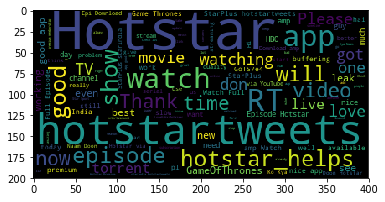

In [108]:
review=' '.join(hotstar['Reviews'])

wc=WordCloud(background_color='black').generate(review)
plt.imshow(wc)

In [109]:
star=hotstar['Reviews'].str.lower().str.replace('[^a-z ]','')

In [110]:
star_clean=star.apply(clean_sentence)
star_clean.head()

0                                                   hh
1                                                     
2    hotstarhelp paymnt premium subscript transact ...
3    hotstartweet current jio network would like kn...
4    hotstartweet episod sarabhai vs sarabhai seaso...
Name: Reviews, dtype: object

In [113]:
vector=CountVectorizer()
vector.fit(star_clean)
dstar=vector.transform(star_clean)
dstar

<5053x6145 sparse matrix of type '<class 'numpy.int64'>'
	with 37273 stored elements in Compressed Sparse Row format>

In [114]:
noof_zeros=(5053*6145)-37273
sparse=noof_zeros/(5053*6145)*100
sparse

99.87996078025331

In [118]:
df_star=pd.DataFrame(dstar.toarray(),columns=vector.get_feature_names())
(df_star==0).sum().sum()

31013412

In [119]:
df_star.sum().sort_values(ascending=False).head()

hotstartweet    1367
hotstar         1351
app              847
watch            767
rt               599
dtype: int64

In [120]:
df_star.sum(axis=1).sort_values(ascending=False).head()

5040    55
5051    50
5052    48
5050    48
5049    45
dtype: int64

In [122]:
train1_x,test1_x=train_test_split(df_star,test_size=0.3,random_state=100)

train1_y=hotstar.iloc[train1_x.index]['Sentiment_Manual']
test1_y=hotstar.iloc[test1_x.index]['Sentiment_Manual']


In [124]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(train1_x,train1_y)
pred=model_rf.predict(test1_x)
print(accuracy_score(test1_y,pred))

0.7077836411609498


In [125]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

model=GaussianNB()
model.fit(train_x,train_y)
pred1=model.predict(test_x)
print(accuracy_score(test_y,pred1))


0.6088888888888889


In [127]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

model1=MultinomialNB()
model1.fit(train_x,train_y)
pred1=model1.predict(test_x)
print(accuracy_score(test_y,pred1))

0.7688888888888888


In [128]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

model=GaussianNB()
model.fit(train1_x,train1_y)
pred2=model.predict(test1_x)
print(accuracy_score(test1_y,pred2))

0.6378627968337731


In [129]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

model=MultinomialNB()
model.fit(train1_x,train1_y)
pred3=model.predict(test1_x)
print(accuracy_score(test1_y,pred3))

0.7453825857519789


## TF-IDF Vectorization

### identify the weightage of the term or the word that is repeated in almost all the document is called as TF-IDF(term frequency-inverse document frequency)

#### IDF=log (no of document/no. of documents the word is appearing)

eg:  IDF= log(4/1)=4

In [132]:
np.log(4)

1.3862943611198906

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

train,test=train_test_split(docs_clean,test_size=0.2,random_state=100)
tfidf=TfidfVectorizer()

tfidf.fit(train)
train_dtm=tfidf.transform(train)
test_dtm=tfidf.transform(test)
df_train=pd.DataFrame(train_dtm.toarray(),columns=tfidf.get_feature_names())
df_test=pd.DataFrame(test_dtm.toarray(),columns=tfidf.get_feature_names())

train_y=imdb.iloc[df_train.index]['sentiment']
test_y=imdb.iloc[df_test.index]['sentiment']
rf_model=RandomForestClassifier(random_state=100,n_estimators=300)
rf_model.fit(df_train,train_y)
rf_pred=rf_model.predict(df_test)
print(accuracy_score(test_y,rf_pred))

0.4866666666666667
